# Exploratory Data Analysis (EDA) for Brent Oil Prices

## Business Relevance
Understanding historical price trends helps energy companies like Birhan Energies identify volatility patterns for better risk management.

## Improvements for Capstone
- Used refactored DataLoader with type hints.
- Added summary stats using dataclass.
- Visualizations saved for dashboard integration.

Loaded 9011 records


c:\Users\HP\Desktop\Brent-Oil-Price-Analysis\notebooks\../src\data_loader.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df['Date'] = pd.to_datetime(self.df['Date'], errors='coerce')


Data preprocessed: 1987-05-20 00:00:00 to 2022-11-14 00:00:00
DataSummary(count=9011, mean=48.42078237709466, median=38.57, std=32.86010995167221, min_price=9.1, max_price=143.95, start_date=Timestamp('1987-05-20 00:00:00'), end_date=Timestamp('2022-11-14 00:00:00'))


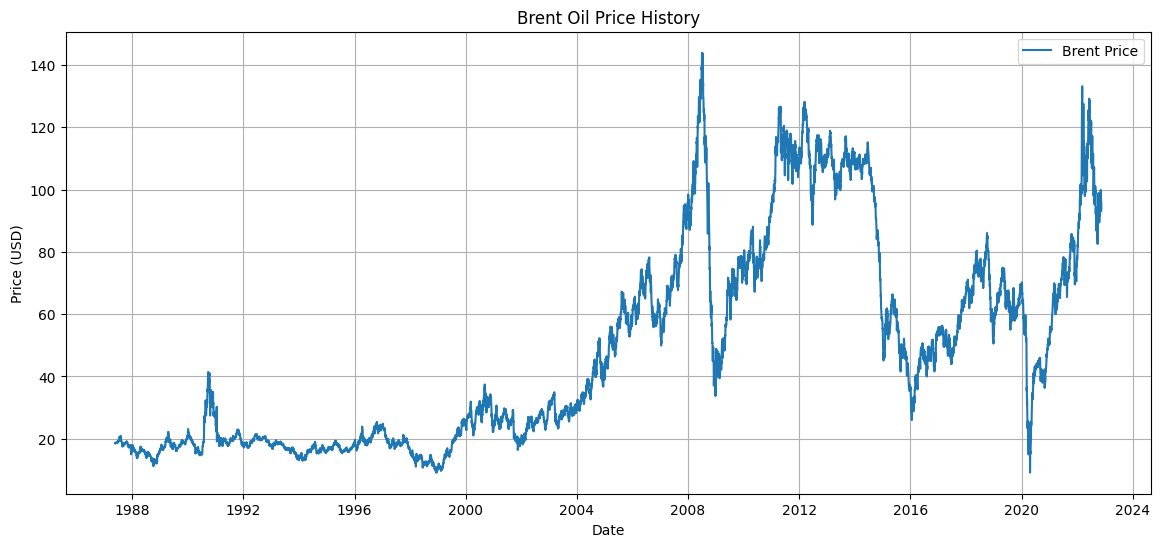

In [2]:
import sys
sys.path.append('../src')
from data_loader import BrentDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load and preprocess data with correct relative path
loader = BrentDataLoader(data_path='../data/events/BrentOilPrices.csv')
df = loader.load_data()
df = loader.preprocess()

# Get summary stats
stats = loader.get_summary_stats()
print(stats)

# Plot price history
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Brent Price')
plt.title('Brent Oil Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
os.makedirs('../outputs/figures', exist_ok=True)
plt.savefig('../outputs/figures/price_history.png')
plt.show()

# Save processed data
df.to_csv('../outputs/data/processed_prices.csv', index=False)

## Key Insights
- Mean price: {stats.mean}
- Data range: {stats.start_date} to {stats.end_date}